# Reproducible code for the manuscript entitled "Evaluation of Clinical Trial Data Sharing Policy in Leading Medical Journals"

In [1]:
! python --version

Python 3.6.8 :: Anaconda, Inc.


In [2]:
import pandas as pd
import numpy as np
import scipy
import scikits.bootstrap as bootstrap
from termcolor import colored
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the file data file DATA_ClinicalTrialsDataSharing.csv

ClinicalTrialsDataSharing=pd.read_csv('Data_ClinicalTrialsDataSharing.csv')
ClinicalTrialsDataSharing.head()

,ID,Title,Authors,PublicationYearMonth,PublicationYearQuarter,DOI,PMID,Journal,DSS,DeclaredDataSharing,...,DataPrivacy,Time/Cost,OngoingTrialResearch,RegulatoryApproval,ProprietaryData,SharedAmongCoTrialistsOnly,MayBeAvailableForCollab,MayBeMadeAvailableUponRequest,FundingStatement,FunderType
0,1,Efficacy and safety of risankizumab in modera...,"Gordon KB, Strober B, Lebwohl M, Augustin M, B...",2018-8,2018-Q3,10.1016/S0140-6736(18)31713-6,30097359,Lancet,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AbbVie and Boehringer Ingelheim.,1_Industry
1,2,Intravenous remifentanil patient-controlled a...,"Wilson MJA, MacArthur C, Hewitt CA, Handley K,...",2018-8,2018-Q3,10.1016/S0140-6736(18)31613-1,30115484,Lancet,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National Institute for Health Research Clinici...,3_NonIndustryNonNIH
2,3,Efficacy and safety of semaglutide compared w...,"ONeil PM, Birkenfeld AL, McGowan B, Mosenzon O...",2018-8,2018-Q3,10.1016/S0140-6736(18)31773-2,30122305,Lancet,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Novo Nordisk A/S.,1_Industry
3,4,Percutaneous Repair or Medical Treatment for ...,"Obadia JF, Messika-Zeitoun D, Leurent G, Iung ...",2018-12,2018-Q4,10.1056/NEJMoa1805374,30145927,NEJM,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Funded by the French Ministry of Health and Re...,4_Mixed
4,5,Tafamidis Treatment for Patients with Transth...,"Maurer MS, Schwartz JH, Gundapaneni B, Elliott...",2018-9,2018-Q3,10.1056/NEJMoa1805689,30145929,NEJM,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Funded by Pfizer,1_Industry


In [4]:
# Read the Data dictionary describing each variable in the data file. 

DataDictionary_ClinicalTrialsDataSharing=pd.read_csv('DataDictionary_ClinicalTrialsDataSharing.csv')

pd.set_option('max_colwidth', 800)
display(DataDictionary_ClinicalTrialsDataSharing)

,VariableName,VariableNameLong,Description
0,ID,Article ID,Internal ID number assigned to each paper during the coding process.
1,Title,Article title,Title of the article
2,Authors,Article authors,List of article authors
3,PublicationYearMonth,Publication year and month,Year and month of publication for the journal article
4,PublicationYearQuarter,Publication year and quarter,Year and quarter of publication for the journal article
5,DOI,Paper DOI number,Digital object identifier for the article
6,PMID,Paper PMID number,PubMed ID for the article
7,Journal,Journal title,Title of the journal publishing the article
8,DSS,Data sharing statement,Text of the data sharing statement for the article.
9,DeclaredDataSharing,Declared data sharing,"Whether or data is sharing is declared in the DSS (0=No, 1=Yes)"


# 1. Prevalence and Conditions of Declared Clinical Trial Data Sharing (see Table 1 in the manuscript)

## 1.1. Declared data sharing

In [5]:
N = ClinicalTrialsDataSharing['ID'].count()
print(colored("Total number of papers:", attrs=['bold']), N)

Total number of papers: 487


In [6]:
print(colored("Number of papers that declared data sharing:", attrs=['bold']), \
      ClinicalTrialsDataSharing['DeclaredDataSharing'].sum())

Number of papers that declared data sharing: 334


In [7]:
print(colored("Percentage of papers that declared data sharing:", attrs=['bold']),\
       ClinicalTrialsDataSharing['DeclaredDataSharing'].mean()*100)

Percentage of papers that declared data sharing: 68.58316221765914


In [8]:
# Compute the 95% confidence intervals for the percentage of declared data sharing 
# among the entire sample of 487 articles

# For reproducibility
np.random.seed(5)

DeclaredDataSharing95CIs = bootstrap.ci(ClinicalTrialsDataSharing['DeclaredDataSharing'], scipy.mean, n_samples=100000)  
print(colored("Bootstrapped 95% confidence intervals for the percentage of declared data sharing, 100,000 itterations:",attrs=['bold']),
       "\nLower:", DeclaredDataSharing95CIs[0]*100, "\nUpper:", DeclaredDataSharing95CIs[1]*100)

Bootstrapped 95% confidence intervals for the percentage of declared data sharing, 100,000 itterations: 
Lower: 64.06570841889116 
Upper: 72.48459958932239


In [9]:
print(colored("Number of papers declaring that data will NOT be shared:", attrs=['bold']), \
      ClinicalTrialsDataSharing['DeclaredDataSharing'].count()-ClinicalTrialsDataSharing['DeclaredDataSharing'].sum())

Number of papers declaring that data will NOT be shared: 153


In [10]:
print(colored("Percentage of papers declaring that data will NOT be shared:", attrs=['bold']), \
      (ClinicalTrialsDataSharing['DeclaredDataSharing'].count()-ClinicalTrialsDataSharing['DeclaredDataSharing'].sum())/\
      ClinicalTrialsDataSharing['DeclaredDataSharing'].count()*100)

Percentage of papers declaring that data will NOT be shared: 31.416837782340863


In [11]:
# Data sharing by Funder Type

print(colored("\nData sharing by Funder Type\n","blue",attrs=['bold']))

print(colored("Total number of papers by Funder type:\n",attrs=['bold']), \
        ClinicalTrialsDataSharing.groupby(['FunderType'])['DeclaredDataSharing'].count())

print(colored("\nNumber of papers that declared data sharing by Funder type:\n",attrs=['bold']), \
        ClinicalTrialsDataSharing.groupby(['FunderType'])['DeclaredDataSharing'].sum())

print(colored("\nPercentage of papers that declared data sharing by Funder type:\n",attrs=['bold']), \
        ClinicalTrialsDataSharing.groupby(['FunderType'])['DeclaredDataSharing'].mean()*100)


Data sharing by Funder Type

Total number of papers by Funder type:
 FunderType
1_Industry             186
2_NonIndustryNIH        45
3_NonIndustryNonNIH    173
4_Mixed                 83
Name: DeclaredDataSharing, dtype: int64

Number of papers that declared data sharing by Funder type:
 FunderType
1_Industry             114
2_NonIndustryNIH        40
3_NonIndustryNonNIH    127
4_Mixed                 53
Name: DeclaredDataSharing, dtype: int64

Percentage of papers that declared data sharing by Funder type:
 FunderType
1_Industry             61.290323
2_NonIndustryNIH       88.888889
3_NonIndustryNonNIH    73.410405
4_Mixed                63.855422
Name: DeclaredDataSharing, dtype: float64


In [12]:
# Data witholding by Funder Type

print(colored("\nData witholding by Funder Type\n","blue",attrs=['bold']))

print(colored("Total number of papers by Funder type:\n",attrs=['bold']), \
            ClinicalTrialsDataSharing.groupby(['FunderType'])['DeclaredDataSharing'].count())

print(colored("\nNumber of papers declaring that data will NOT be shared by Funder type:\n",attrs=['bold']), \
            ClinicalTrialsDataSharing.groupby(['FunderType'])['DeclaredDataSharing'].count()- \
             ClinicalTrialsDataSharing.groupby(['FunderType'])['DeclaredDataSharing'].sum())

print(colored("\nPercentage of papers declaring that data will NOT be shared by Funder type:\n",attrs=['bold']),\
            (ClinicalTrialsDataSharing.groupby(['FunderType'])['DeclaredDataSharing'].count()- \
            ClinicalTrialsDataSharing.groupby(['FunderType'])['DeclaredDataSharing'].sum())/ \
            ClinicalTrialsDataSharing.groupby(['FunderType'])['DeclaredDataSharing'].count()*100)


Data witholding by Funder Type

Total number of papers by Funder type:
 FunderType
1_Industry             186
2_NonIndustryNIH        45
3_NonIndustryNonNIH    173
4_Mixed                 83
Name: DeclaredDataSharing, dtype: int64

Number of papers declaring that data will NOT be shared by Funder type:
 FunderType
1_Industry             72
2_NonIndustryNIH        5
3_NonIndustryNonNIH    46
4_Mixed                30
Name: DeclaredDataSharing, dtype: int64

Percentage of papers declaring that data will NOT be shared by Funder type:
 FunderType
1_Industry             38.709677
2_NonIndustryNIH       11.111111
3_NonIndustryNonNIH    26.589595
4_Mixed                36.144578
Name: DeclaredDataSharing, dtype: float64


## 1.2. Number and percentage of papers in our sample by Journal and Funder Type

In [13]:
print(colored("\nNumber of papers by Journal and Funder type:\n",attrs=['bold']), \
            ClinicalTrialsDataSharing.groupby(['FunderType','Journal'])['Journal'].count())

nPapers_Funder = ClinicalTrialsDataSharing.groupby(['FunderType'])["ID"].count()
nPapers_Journal = ClinicalTrialsDataSharing.groupby(['Journal'])["ID"].count() 

nPapers_Journal_Funder = ClinicalTrialsDataSharing.groupby(['FunderType','Journal'])['ID'].count()

nPapers_Journal_Funder['1_Industry']/nPapers_Funder['1_Industry']*100

print(colored("\nIndustry funding — Percentage of papers by",attrs=['bold']), \
    nPapers_Journal_Funder['1_Industry']/nPapers_Funder['1_Industry']*100)

print(colored("\nNon-industry NIH funding — Percentage of papers by",attrs=['bold']), \
    nPapers_Journal_Funder['2_NonIndustryNIH']/nPapers_Funder['2_NonIndustryNIH']*100)

print(colored("\nNon-industry non-NIH funding — Percentage of papers by",attrs=['bold']), \
    nPapers_Journal_Funder['3_NonIndustryNonNIH']/nPapers_Funder['3_NonIndustryNonNIH']*100)
    
print(colored("\nMixed funding — Percentage of papers by",attrs=['bold']), \
    nPapers_Journal_Funder['4_Mixed']/nPapers_Funder['4_Mixed']*100)

print(colored("\nNumber of papers by",attrs=['bold']), \
      ClinicalTrialsDataSharing.groupby(['Journal'])["ID"].count())

print(colored("\nPercentage of papers by",attrs=['bold']), nPapers_Journal/N*100)


Number of papers by Journal and Funder type:
 FunderType           Journal
1_Industry           JAMA        21
                     Lancet      57
                     NEJM       108
2_NonIndustryNIH     JAMA        18
                     Lancet       7
                     NEJM        20
3_NonIndustryNonNIH  JAMA        50
                     Lancet      64
                     NEJM        59
4_Mixed              JAMA        23
                     Lancet      19
                     NEJM        41
Name: Journal, dtype: int64

Industry funding — Percentage of papers by Journal
JAMA      11.290323
Lancet    30.645161
NEJM      58.064516
Name: ID, dtype: float64

Non-industry NIH funding — Percentage of papers by Journal
JAMA      40.000000
Lancet    15.555556
NEJM      44.444444
Name: ID, dtype: float64

Non-industry non-NIH funding — Percentage of papers by Journal
JAMA      28.901734
Lancet    36.994220
NEJM      34.104046
Name: ID, dtype: float64

Mixed funding — Percentage of pa

## 1.3. Declared data sharing by Journal and Funder type

In [14]:
print(colored("\nDeclared data sharing by Journal and Funder type",'blue',attrs=['bold']))
print(colored("\nNumber of papers by Journal and Funder type:\n",attrs=['bold']),\
      ClinicalTrialsDataSharing.groupby(['Journal','FunderType'])["DeclaredDataSharing"].sum())
print(colored("\nTotal number of papers by Journal and Funder type:\n",attrs=['bold']),\
      ClinicalTrialsDataSharing.groupby(['Journal','FunderType'])["DeclaredDataSharing"].count())
print(colored("\nPercentage of papers by Journal and Funder type:\n",attrs=['bold']), \
        (ClinicalTrialsDataSharing.groupby(['Journal','FunderType'])["DeclaredDataSharing"].sum() / \
        ClinicalTrialsDataSharing.groupby(['Journal','FunderType'])["DeclaredDataSharing"].count())*100)
print(colored("\nNumber of papers by Journal:\n",attrs=['bold']),\
      ClinicalTrialsDataSharing.groupby(['Journal'])["DeclaredDataSharing"].sum())
print(colored("\nTotal number of papers by Journal:\n",attrs=['bold']),\
      ClinicalTrialsDataSharing.groupby(['Journal'])["DeclaredDataSharing"].count())
print(colored("\nPercentage of papers by Journal:\n",attrs=['bold']), \
        ClinicalTrialsDataSharing.groupby(['Journal'])["DeclaredDataSharing"].sum() / \
        ClinicalTrialsDataSharing.groupby(['Journal'])["DeclaredDataSharing"].count()*100)


Declared data sharing by Journal and Funder type

Number of papers by Journal and Funder type:
 Journal  FunderType         
JAMA     1_Industry              8
         2_NonIndustryNIH       17
         3_NonIndustryNonNIH    28
         4_Mixed                13
Lancet   1_Industry             46
         2_NonIndustryNIH        6
         3_NonIndustryNonNIH    54
         4_Mixed                13
NEJM     1_Industry             60
         2_NonIndustryNIH       17
         3_NonIndustryNonNIH    45
         4_Mixed                27
Name: DeclaredDataSharing, dtype: int64

Total number of papers by Journal and Funder type:
 Journal  FunderType         
JAMA     1_Industry              21
         2_NonIndustryNIH        18
         3_NonIndustryNonNIH     50
         4_Mixed                 23
Lancet   1_Industry              57
         2_NonIndustryNIH         7
         3_NonIndustryNonNIH     64
         4_Mixed                 19
NEJM     1_Industry             108
        

## 1.4. Type of Data to be made available to others

### The analysis in the following sections 1.4 to 1.6 is among data sharing articles

In [15]:
# Select articles declaring that data will be made available to others

ClinicalTrialsDataSharing_YES = ClinicalTrialsDataSharing[ClinicalTrialsDataSharing.DeclaredDataSharing == 1]
N_Sharing = ClinicalTrialsDataSharing_YES['ID'].count()

In [16]:
# This function summarizes quantities regarding types of clinical trial data articles declare to share

def TypeData(ArticlesSharingData, TypeData, Title):
    print(colored("\nType of data: {0}\n".format(Title),'blue',attrs=['bold']))
    print(colored("Number of papers by Funder type\n",attrs=['bold']), \
        ArticlesSharingData.groupby(['FunderType'])[TypeData].count())
    print(colored("\nPercentage of papers by Funder type\n",attrs=['bold']), \
        ArticlesSharingData.groupby(['FunderType'])[TypeData].count()/ \
        ArticlesSharingData.groupby(['FunderType'])['ID'].count()*100)
    print(colored("\nNumber of papers\n",attrs=['bold']), \
        ArticlesSharingData.groupby([TypeData])['ID'].count())
    print(colored("\nPercentage of papers\n",attrs=['bold']), \
        ArticlesSharingData.groupby([TypeData])['ID'].count()/N_Sharing*100)

In [17]:
TypeData(ClinicalTrialsDataSharing_YES, "Individual", "Deidentified Individual Participant data")


Type of data: Deidentified Individual Participant data

Number of papers by Funder type
 FunderType
1_Industry             83
2_NonIndustryNIH       33
3_NonIndustryNonNIH    95
4_Mixed                44
Name: Individual, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry             72.807018
2_NonIndustryNIH       82.500000
3_NonIndustryNonNIH    74.803150
4_Mixed                83.018868
dtype: float64

Number of papers
 Individual
1.0    255
Name: ID, dtype: int64

Percentage of papers
 Individual
1.0    76.347305
Name: ID, dtype: float64


In [18]:
TypeData(ClinicalTrialsDataSharing_YES, "Aggregate", "Aggregate data only")


Type of data: Aggregate data only

Number of papers by Funder type
 FunderType
1_Industry             2
2_NonIndustryNIH       0
3_NonIndustryNonNIH    1
4_Mixed                0
Name: Aggregate, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry             1.754386
2_NonIndustryNIH       0.000000
3_NonIndustryNonNIH    0.787402
4_Mixed                0.000000
dtype: float64

Number of papers
 Aggregate
1.0    3
Name: ID, dtype: int64

Percentage of papers
 Aggregate
1.0    0.898204
Name: ID, dtype: float64


In [19]:
TypeData(ClinicalTrialsDataSharing_YES, "Unspeficied", "Unspecified/ partial data")


Type of data: Unspecified/ partial data

Number of papers by Funder type
 FunderType
1_Industry             29
2_NonIndustryNIH        7
3_NonIndustryNonNIH    31
4_Mixed                 9
Name: Unspeficied, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry             25.438596
2_NonIndustryNIH       17.500000
3_NonIndustryNonNIH    24.409449
4_Mixed                16.981132
dtype: float64

Number of papers
 Unspeficied
1.0    76
Name: ID, dtype: int64

Percentage of papers
 Unspeficied
1.0    22.754491
Name: ID, dtype: float64


## 1.5. Access to Data 

In [20]:
# This function summarizes quantities regarding ways in which 
# papers propose to provide access to clinical trial data. 

def AccessToData(ArticlesSharingData, TypeAccess, Title):
    print(colored("\nAccess to data: {0}\n".format(Title),'blue',attrs=['bold']))
    print(colored("Number of papers by Funder type\n",attrs=['bold']), \
        ArticlesSharingData.groupby(['FunderType'])[TypeAccess].count())
    print(colored("\nPercentage of papers by Funder type\n",attrs=['bold']), \
        ArticlesSharingData.groupby(['FunderType'])[TypeAccess].count()/ \
        ArticlesSharingData.groupby(['FunderType'])['ID'].count()*100)
    print(colored("\nNumber of papers\n",attrs=['bold']), \
        ArticlesSharingData.groupby([TypeAccess])['ID'].count())
    print(colored("\nPercentage of papers\n",attrs=['bold']), \
        ArticlesSharingData.groupby([TypeAccess])['ID'].count()/N_Sharing*100)

In [21]:
# Request to Author

AccessToData(ClinicalTrialsDataSharing_YES,"RqstAuthors", "Request to Author")


Access to data: Request to Author

Number of papers by Funder type
 FunderType
1_Industry              9
2_NonIndustryNIH       15
3_NonIndustryNonNIH    96
4_Mixed                23
Name: RqstAuthors, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry              7.894737
2_NonIndustryNIH       37.500000
3_NonIndustryNonNIH    75.590551
4_Mixed                43.396226
dtype: float64

Number of papers
 RqstAuthors
1.0    143
Name: ID, dtype: int64

Percentage of papers
 RqstAuthors
1.0    42.814371
Name: ID, dtype: float64


In [22]:
# Request to committee, group, unit

AccessToData(ClinicalTrialsDataSharing_YES,"RqstCommGroupUnit", "Request to committee, group, unit")


Access to data: Request to committee, group, unit

Number of papers by Funder type
 FunderType
1_Industry             15
2_NonIndustryNIH        3
3_NonIndustryNonNIH    36
4_Mixed                13
Name: RqstCommGroupUnit, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry             13.157895
2_NonIndustryNIH        7.500000
3_NonIndustryNonNIH    28.346457
4_Mixed                24.528302
dtype: float64

Number of papers
 RqstCommGroupUnit
1.0    67
Name: ID, dtype: int64

Percentage of papers
 RqstCommGroupUnit
1.0    20.05988
Name: ID, dtype: float64


In [23]:
# Request to repository

AccessToData(ClinicalTrialsDataSharing_YES,"RqstRepository", "Request to repository")


Access to data: Request to repository

Number of papers by Funder type
 FunderType
1_Industry             46
2_NonIndustryNIH       22
3_NonIndustryNonNIH     5
4_Mixed                16
Name: RqstRepository, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry             40.350877
2_NonIndustryNIH       55.000000
3_NonIndustryNonNIH     3.937008
4_Mixed                30.188679
dtype: float64

Number of papers
 RqstRepository
1.0    89
Name: ID, dtype: int64

Percentage of papers
 RqstRepository
1.0    26.646707
Name: ID, dtype: float64


In [24]:
# Request to company

AccessToData(ClinicalTrialsDataSharing_YES,"RqstCompany", "Request to company")


Access to data: Request to company

Number of papers by Funder type
 FunderType
1_Industry             72
2_NonIndustryNIH        0
3_NonIndustryNonNIH     0
4_Mixed                 6
Name: RqstCompany, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry             63.157895
2_NonIndustryNIH        0.000000
3_NonIndustryNonNIH     0.000000
4_Mixed                11.320755
dtype: float64

Number of papers
 RqstCompany
1.0    78
Name: ID, dtype: int64

Percentage of papers
 RqstCompany
1.0    23.353293
Name: ID, dtype: float64


In [25]:
# Access is unspecified

AccessToData(ClinicalTrialsDataSharing_YES,"AccessUnspecified", "Access is unspecified")


Access to data: Access is unspecified

Number of papers by Funder type
 FunderType
1_Industry             5
2_NonIndustryNIH       2
3_NonIndustryNonNIH    5
4_Mixed                3
Name: AccessUnspecified, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry             4.385965
2_NonIndustryNIH       5.000000
3_NonIndustryNonNIH    3.937008
4_Mixed                5.660377
dtype: float64

Number of papers
 AccessUnspecified
1.0    15
Name: ID, dtype: int64

Percentage of papers
 AccessUnspecified
1.0    4.491018
Name: ID, dtype: float64


In [26]:
# Data is available to others to use

AccessToData(ClinicalTrialsDataSharing_YES,"DataAvailableToOthers", "Data is available to others to use")


Access to data: Data is available to others to use

Number of papers by Funder type
 FunderType
1_Industry             0
2_NonIndustryNIH       0
3_NonIndustryNonNIH    2
4_Mixed                0
Name: DataAvailableToOthers, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry             0.000000
2_NonIndustryNIH       0.000000
3_NonIndustryNonNIH    1.574803
4_Mixed                0.000000
dtype: float64

Number of papers
 DataAvailableToOthers
1.0    2
Name: ID, dtype: int64

Percentage of papers
 DataAvailableToOthers
1.0    0.598802
Name: ID, dtype: float64


## 1.6. Conditions for data access

In [27]:
# This function summarizes quantities regarding conditions for data sharing among papers declaring to share data.

def ConditionsForDataAccess(ArticlesSharingData, ConditionDataAccess, Title):
    print(colored("\nConditions for data access: {0}\n".format(Title),'blue',attrs=['bold']))
    print(colored("Number of papers by Funder type\n",attrs=['bold']), \
        ArticlesSharingData.groupby(['FunderType'])[ConditionDataAccess].count())
    print(colored("\nPercentage of papers by Funder type\n",attrs=['bold']), \
        ArticlesSharingData.groupby(['FunderType'])[ConditionDataAccess].count()/ \
        ArticlesSharingData.groupby(['FunderType'])['ID'].count()*100)
    print(colored("\nNumber of papers\n",attrs=['bold']), \
        ArticlesSharingData.groupby([ConditionDataAccess])['ID'].count())
    print(colored("\nPercentage of papers\n",attrs=['bold']), \
        ArticlesSharingData.groupby([ConditionDataAccess])['ID'].count()/N_Sharing*100)

In [28]:
# Embargo period

ConditionsForDataAccess(ClinicalTrialsDataSharing_YES, "Embargo", "Embargo")


Conditions for data access: Embargo

Number of papers by Funder type
 FunderType
1_Industry             49
2_NonIndustryNIH       22
3_NonIndustryNonNIH    57
4_Mixed                30
Name: Embargo, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry             42.982456
2_NonIndustryNIH       55.000000
3_NonIndustryNonNIH    44.881890
4_Mixed                56.603774
dtype: float64

Number of papers
 Embargo
1.0    158
Name: ID, dtype: int64

Percentage of papers
 Embargo
1.0    47.305389
Name: ID, dtype: float64


In [29]:
# Embargo period up to 1 year

ConditionsForDataAccess(ClinicalTrialsDataSharing_YES, "EmbargoUpTo1Y", "Embargo period up to 1 year")


Conditions for data access: Embargo period up to 1 year

Number of papers by Funder type
 FunderType
1_Industry             20
2_NonIndustryNIH       13
3_NonIndustryNonNIH    30
4_Mixed                18
Name: EmbargoUpTo1Y, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry             17.543860
2_NonIndustryNIH       32.500000
3_NonIndustryNonNIH    23.622047
4_Mixed                33.962264
dtype: float64

Number of papers
 EmbargoUpTo1Y
1.0    81
Name: ID, dtype: int64

Percentage of papers
 EmbargoUpTo1Y
1.0    24.251497
Name: ID, dtype: float64


In [30]:
# Embargo period above 1 year and up to 2 years

ConditionsForDataAccess(ClinicalTrialsDataSharing_YES, "EmbargoAbove1Yto2Y", "Embargo period above 1 year and up to 2 years")


Conditions for data access: Embargo period above 1 year and up to 2 years

Number of papers by Funder type
 FunderType
1_Industry             13
2_NonIndustryNIH        7
3_NonIndustryNonNIH    13
4_Mixed                 6
Name: EmbargoAbove1Yto2Y, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry             11.403509
2_NonIndustryNIH       17.500000
3_NonIndustryNonNIH    10.236220
4_Mixed                11.320755
dtype: float64

Number of papers
 EmbargoAbove1Yto2Y
1.0    39
Name: ID, dtype: int64

Percentage of papers
 EmbargoAbove1Yto2Y
1.0    11.676647
Name: ID, dtype: float64


In [31]:
# Embargo period above 2 years

ConditionsForDataAccess(ClinicalTrialsDataSharing_YES, "EmbargoAbove2Y", "Embargo period above 2 years")


Conditions for data access: Embargo period above 2 years

Number of papers by Funder type
 FunderType
1_Industry             4
2_NonIndustryNIH       2
3_NonIndustryNonNIH    4
4_Mixed                5
Name: EmbargoAbove2Y, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry             3.508772
2_NonIndustryNIH       5.000000
3_NonIndustryNonNIH    3.149606
4_Mixed                9.433962
dtype: float64

Number of papers
 EmbargoAbove2Y
1.0    15
Name: ID, dtype: int64

Percentage of papers
 EmbargoAbove2Y
1.0    4.491018
Name: ID, dtype: float64


In [32]:
# Product approval

ConditionsForDataAccess(ClinicalTrialsDataSharing_YES, "ProductApproval", "Product approval")


Conditions for data access: Product approval

Number of papers by Funder type
 FunderType
1_Industry             36
2_NonIndustryNIH        0
3_NonIndustryNonNIH     0
4_Mixed                 1
Name: ProductApproval, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry             31.578947
2_NonIndustryNIH        0.000000
3_NonIndustryNonNIH     0.000000
4_Mixed                 1.886792
dtype: float64

Number of papers
 ProductApproval
1.0    37
Name: ID, dtype: int64

Percentage of papers
 ProductApproval
1.0    11.077844
Name: ID, dtype: float64


In [33]:
# Collaboration

ConditionsForDataAccess(ClinicalTrialsDataSharing_YES, "Collaboration", "Collaboration")


Conditions for data access: Collaboration

Number of papers by Funder type
 FunderType
1_Industry             0
2_NonIndustryNIH       2
3_NonIndustryNonNIH    6
4_Mixed                1
Name: Collaboration, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry             0.000000
2_NonIndustryNIH       5.000000
3_NonIndustryNonNIH    4.724409
4_Mixed                1.886792
dtype: float64

Number of papers
 Collaboration
1.0    9
Name: ID, dtype: int64

Percentage of papers
 Collaboration
1.0    2.694611
Name: ID, dtype: float64


## 1.7. Reasons for why data not available 
### The analysis in this section is among articles declaring that data will NOT be made available

In [34]:
# Select articles that declared that data will NOT be made available to others

ClinicalTrialsDataSharing_NO = ClinicalTrialsDataSharing[ClinicalTrialsDataSharing.DeclaredDataSharing == 0]
N_NotSharing = ClinicalTrialsDataSharing_NO['ID'].count()

In [35]:
# This function summarizes reasons for why data will NOT be made available among non-sharing articles.

def ReasonsForNotSharingData(ArticlesNotSharingData, Reason, Title):
    print(colored("\nReasons for why data not available: {0}\n".format(Title),'blue',attrs=['bold']))
    print(colored("Number of papers by Funder type\n",attrs=['bold']), \
        ArticlesNotSharingData.groupby(['FunderType'])[Reason].count())
    print(colored("\nPercentage of papers by Funder type\n",attrs=['bold']), \
        ArticlesNotSharingData.groupby(['FunderType'])[Reason].count()/ \
        ArticlesNotSharingData.groupby(['FunderType'])['ID'].count()*100)
    print(colored("\nNumber of papers\n",attrs=['bold']), \
        ArticlesNotSharingData.groupby([Reason])['ID'].count())
    print(colored("\nPercentage of papers\n",attrs=['bold']), \
        ArticlesNotSharingData.groupby([Reason])['ID'].count()/N_NotSharing*100)

In [36]:
# No reason provided 

ReasonsForNotSharingData(ClinicalTrialsDataSharing_NO, "NoReason", "No reason provided")


Reasons for why data not available: No reason provided

Number of papers by Funder type
 FunderType
1_Industry             40
2_NonIndustryNIH        2
3_NonIndustryNonNIH    26
4_Mixed                15
Name: NoReason, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry             55.555556
2_NonIndustryNIH       40.000000
3_NonIndustryNonNIH    56.521739
4_Mixed                50.000000
dtype: float64

Number of papers
 NoReason
1.0    83
Name: ID, dtype: int64

Percentage of papers
 NoReason
1.0    54.248366
Name: ID, dtype: float64


In [37]:
# Data privacy

ReasonsForNotSharingData(ClinicalTrialsDataSharing_NO, "DataPrivacy", "Data privacy")


Reasons for why data not available: Data privacy

Number of papers by Funder type
 FunderType
1_Industry             3
2_NonIndustryNIH       1
3_NonIndustryNonNIH    9
4_Mixed                2
Name: DataPrivacy, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry              4.166667
2_NonIndustryNIH       20.000000
3_NonIndustryNonNIH    19.565217
4_Mixed                 6.666667
dtype: float64

Number of papers
 DataPrivacy
1.0    15
Name: ID, dtype: int64

Percentage of papers
 DataPrivacy
1.0    9.803922
Name: ID, dtype: float64


In [38]:
# Time and Cost

ReasonsForNotSharingData(ClinicalTrialsDataSharing_NO, "Time/Cost", "Time and Cost")


Reasons for why data not available: Time and Cost

Number of papers by Funder type
 FunderType
1_Industry             0
2_NonIndustryNIH       0
3_NonIndustryNonNIH    2
4_Mixed                0
Name: Time/Cost, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry             0.000000
2_NonIndustryNIH       0.000000
3_NonIndustryNonNIH    4.347826
4_Mixed                0.000000
dtype: float64

Number of papers
 Time/Cost
1.0    2
Name: ID, dtype: int64

Percentage of papers
 Time/Cost
1.0    1.30719
Name: ID, dtype: float64


In [39]:
# Ongoing trial or research

ReasonsForNotSharingData(ClinicalTrialsDataSharing_NO, "OngoingTrialResearch", "Ongoing trial or research")


Reasons for why data not available: Ongoing trial or research

Number of papers by Funder type
 FunderType
1_Industry             2
2_NonIndustryNIH       0
3_NonIndustryNonNIH    2
4_Mixed                9
Name: OngoingTrialResearch, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry              2.777778
2_NonIndustryNIH        0.000000
3_NonIndustryNonNIH     4.347826
4_Mixed                30.000000
dtype: float64

Number of papers
 OngoingTrialResearch
1.0    13
Name: ID, dtype: int64

Percentage of papers
 OngoingTrialResearch
1.0    8.496732
Name: ID, dtype: float64


In [40]:
# Regulatory approval

ReasonsForNotSharingData(ClinicalTrialsDataSharing_NO, "RegulatoryApproval", "Regulatory approval")


Reasons for why data not available: Regulatory approval

Number of papers by Funder type
 FunderType
1_Industry             3
2_NonIndustryNIH       0
3_NonIndustryNonNIH    1
4_Mixed                0
Name: RegulatoryApproval, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry             4.166667
2_NonIndustryNIH       0.000000
3_NonIndustryNonNIH    2.173913
4_Mixed                0.000000
dtype: float64

Number of papers
 RegulatoryApproval
1.0    4
Name: ID, dtype: int64

Percentage of papers
 RegulatoryApproval
1.0    2.614379
Name: ID, dtype: float64


In [41]:
# Data is proprietary

ReasonsForNotSharingData(ClinicalTrialsDataSharing_NO, "ProprietaryData", "Proprietary data")


Reasons for why data not available: Proprietary data

Number of papers by Funder type
 FunderType
1_Industry             7
2_NonIndustryNIH       0
3_NonIndustryNonNIH    4
4_Mixed                3
Name: ProprietaryData, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry              9.722222
2_NonIndustryNIH        0.000000
3_NonIndustryNonNIH     8.695652
4_Mixed                10.000000
dtype: float64

Number of papers
 ProprietaryData
1.0    14
Name: ID, dtype: int64

Percentage of papers
 ProprietaryData
1.0    9.150327
Name: ID, dtype: float64


In [42]:
# Data is shared among co-trialists only

ReasonsForNotSharingData(ClinicalTrialsDataSharing_NO, "SharedAmongCoTrialistsOnly", "Data is shared among co-trialists only")


Reasons for why data not available: Data is shared among co-trialists only

Number of papers by Funder type
 FunderType
1_Industry             2
2_NonIndustryNIH       0
3_NonIndustryNonNIH    0
4_Mixed                0
Name: SharedAmongCoTrialistsOnly, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry             2.777778
2_NonIndustryNIH       0.000000
3_NonIndustryNonNIH    0.000000
4_Mixed                0.000000
dtype: float64

Number of papers
 SharedAmongCoTrialistsOnly
1.0    2
Name: ID, dtype: int64

Percentage of papers
 SharedAmongCoTrialistsOnly
1.0    1.30719
Name: ID, dtype: float64


In [43]:
# Data may be available for collaboration

ReasonsForNotSharingData(ClinicalTrialsDataSharing_NO, "MayBeAvailableForCollab", "Data may be available for collaboration")


Reasons for why data not available: Data may be available for collaboration

Number of papers by Funder type
 FunderType
1_Industry             6
2_NonIndustryNIH       0
3_NonIndustryNonNIH    0
4_Mixed                1
Name: MayBeAvailableForCollab, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry             8.333333
2_NonIndustryNIH       0.000000
3_NonIndustryNonNIH    0.000000
4_Mixed                3.333333
dtype: float64

Number of papers
 MayBeAvailableForCollab
1.0    7
Name: ID, dtype: int64

Percentage of papers
 MayBeAvailableForCollab
1.0    4.575163
Name: ID, dtype: float64


In [44]:
# Data may be available upon request

ReasonsForNotSharingData(ClinicalTrialsDataSharing_NO, "MayBeMadeAvailableUponRequest", "Data may be available upon request")


Reasons for why data not available: Data may be available upon request

Number of papers by Funder type
 FunderType
1_Industry             19
2_NonIndustryNIH        2
3_NonIndustryNonNIH     6
4_Mixed                 7
Name: MayBeMadeAvailableUponRequest, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry             26.388889
2_NonIndustryNIH       40.000000
3_NonIndustryNonNIH    13.043478
4_Mixed                23.333333
dtype: float64

Number of papers
 MayBeMadeAvailableUponRequest
1.0    34
Name: ID, dtype: int64

Percentage of papers
 MayBeMadeAvailableUponRequest
1.0    22.222222
Name: ID, dtype: float64


# 2. Declared versus Actual Availability of Data in Repository by Type of Funding (See Table 2 in the manuscript)

In [45]:
# Select articles that proposed to make data available (upon request) on a repository

ClinicalTrialsDataSharing_RepositoryRequest = ClinicalTrialsDataSharing[ClinicalTrialsDataSharing.RqstRepository == 1]
N_RepositoryRequest = ClinicalTrialsDataSharing_RepositoryRequest['ID'].count()

## 2.1. Is information about data logged in repository?

In [46]:
    print(colored("\nRequest to repository: Information about data is logged in repository\n",'blue',attrs=['bold']))
    print(colored("Number of papers by Funder type\n",attrs=['bold']), \
        ClinicalTrialsDataSharing_RepositoryRequest.groupby(['FunderType'])['InformationAboutDataOnRepository'].sum())
    print(colored("\nNumber of ALL papers (declaring to make data available through a repository) by Funder type\n",attrs=['bold']), \
        ClinicalTrialsDataSharing_RepositoryRequest.groupby(['FunderType'])['InformationAboutDataOnRepository'].count())
    print(colored("\nPercentage of papers by Funder type\n",attrs=['bold']), \
        ClinicalTrialsDataSharing_RepositoryRequest.groupby(['FunderType'])['InformationAboutDataOnRepository'].sum()/ \
        ClinicalTrialsDataSharing_RepositoryRequest.groupby(['FunderType'])['ID'].count()*100)
    print(colored("\nNumber of papers\n",attrs=['bold']), \
        ClinicalTrialsDataSharing_RepositoryRequest.groupby(['InformationAboutDataOnRepository'])['ID'].count())
    print(colored("\nPercentage of papers\n",attrs=['bold']), \
        ClinicalTrialsDataSharing_RepositoryRequest.groupby(['InformationAboutDataOnRepository'])['ID'].count()/N_RepositoryRequest*100)


Request to repository: Information about data is logged in repository

Number of papers by Funder type
 FunderType
1_Industry             9.0
2_NonIndustryNIH       7.0
3_NonIndustryNonNIH    1.0
4_Mixed                3.0
Name: InformationAboutDataOnRepository, dtype: float64

Number of ALL papers (declaring to make data available through a repository) by Funder type
 FunderType
1_Industry             46
2_NonIndustryNIH       22
3_NonIndustryNonNIH     5
4_Mixed                16
Name: InformationAboutDataOnRepository, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry             19.565217
2_NonIndustryNIH       31.818182
3_NonIndustryNonNIH    20.000000
4_Mixed                18.750000
dtype: float64

Number of papers
 InformationAboutDataOnRepository
0.0    69
1.0    20
Name: ID, dtype: int64

Percentage of papers
 InformationAboutDataOnRepository
0.0    77.52809
1.0    22.47191
Name: ID, dtype: float64


## 2.2. Are data available on repository to request?

In [47]:
    print(colored("\nRequest to repository: Data is available on repository to request\n",'blue',attrs=['bold']))
    print(colored("Number of papers by Funder type\n",attrs=['bold']), \
        ClinicalTrialsDataSharing_RepositoryRequest.groupby(['FunderType'])['DataAvailableOnRepository'].sum())
    print(colored("\nNumber of ALL papers (declaring to make data available through a repository) by Funder type\n",attrs=['bold']), \
        ClinicalTrialsDataSharing_RepositoryRequest.groupby(['FunderType'])['DataAvailableOnRepository'].count())
    print(colored("\nPercentage of papers by Funder type\n",attrs=['bold']), \
        ClinicalTrialsDataSharing_RepositoryRequest.groupby(['FunderType'])['DataAvailableOnRepository'].sum()/ \
        ClinicalTrialsDataSharing_RepositoryRequest.groupby(['FunderType'])['ID'].count()*100)
    print(colored("\nNumber of papers\n",attrs=['bold']), \
        ClinicalTrialsDataSharing_RepositoryRequest.groupby(['DataAvailableOnRepository'])['ID'].count())
    print(colored("\nPercentage of papers\n",attrs=['bold']), \
        ClinicalTrialsDataSharing_RepositoryRequest.groupby(['DataAvailableOnRepository'])['ID'].count()/N_RepositoryRequest*100)


Request to repository: Data is available on repository to request

Number of papers by Funder type
 FunderType
1_Industry             7.0
2_NonIndustryNIH       7.0
3_NonIndustryNonNIH    0.0
4_Mixed                3.0
Name: DataAvailableOnRepository, dtype: float64

Number of ALL papers (declaring to make data available through a repository) by Funder type
 FunderType
1_Industry             46
2_NonIndustryNIH       22
3_NonIndustryNonNIH     5
4_Mixed                16
Name: DataAvailableOnRepository, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry             15.217391
2_NonIndustryNIH       31.818182
3_NonIndustryNonNIH     0.000000
4_Mixed                18.750000
dtype: float64

Number of papers
 DataAvailableOnRepository
0.0    72
1.0    17
Name: ID, dtype: int64

Percentage of papers
 DataAvailableOnRepository
0.0    80.898876
1.0    19.101124
Name: ID, dtype: float64


## 2.3. Relationship between data unavailability in repositories and embargo or product approval

In [48]:
# Declared Embargo OR Product Approval among articles for which data were not available on repositories to request

ClinicalTrialsDataSharing_NotAvailableOnRepository = ClinicalTrialsDataSharing[ClinicalTrialsDataSharing.DataAvailableOnRepository == 0]
N_NotAvailableOnRepository = ClinicalTrialsDataSharing_NotAvailableOnRepository['ID'].count()

In [49]:
    print(colored("\nEmbargo and Product approval among papers for which data were NOT available on repository\n",'blue',attrs=['bold']))
    print(colored("Number of papers by Funder type\n",attrs=['bold']), \
        ClinicalTrialsDataSharing_NotAvailableOnRepository.groupby(['FunderType'])['EmbargoOrProductApproval'].sum())
    print(colored("\nNumber of ALL papers that declared to make data available through a repository by Funder type\n",attrs=['bold']), \
        ClinicalTrialsDataSharing_NotAvailableOnRepository.groupby(['FunderType'])['ID'].count())
    print(colored("\nPercentage of papers by Funder type\n",attrs=['bold']), \
        ClinicalTrialsDataSharing_NotAvailableOnRepository.groupby(['FunderType'])['EmbargoOrProductApproval'].sum()/ \
        ClinicalTrialsDataSharing_NotAvailableOnRepository.groupby(['FunderType'])['ID'].count()*100)
    print(colored("\nNumber of papers\n",attrs=['bold']), \
        ClinicalTrialsDataSharing_NotAvailableOnRepository.groupby(['EmbargoOrProductApproval'])['ID'].count())
    print(colored("\nPercentage of papers\n",attrs=['bold']), \
        ClinicalTrialsDataSharing_NotAvailableOnRepository.groupby(['EmbargoOrProductApproval'])['ID'].count()/N_NotAvailableOnRepository*100)


Embargo and Product approval among papers for which data were NOT available on repository

Number of papers by Funder type
 FunderType
1_Industry             22.0
2_NonIndustryNIH        8.0
3_NonIndustryNonNIH     2.0
4_Mixed                 5.0
Name: EmbargoOrProductApproval, dtype: float64

Number of ALL papers that declared to make data available through a repository by Funder type
 FunderType
1_Industry             39
2_NonIndustryNIH       15
3_NonIndustryNonNIH     5
4_Mixed                13
Name: ID, dtype: int64

Percentage of papers by Funder type
 FunderType
1_Industry             56.410256
2_NonIndustryNIH       53.333333
3_NonIndustryNonNIH    40.000000
4_Mixed                38.461538
dtype: float64

Number of papers
 EmbargoOrProductApproval
1.0    37
Name: ID, dtype: int64

Percentage of papers
 EmbargoOrProductApproval
1.0    51.388889
Name: ID, dtype: float64


# 3. Percentage and 95% CI for declared data sharing by Funder type, Journal, and Publication Date (Figure 1 in the manuscript) 

In [50]:
sns.set(style="ticks", color_codes=True); np.random.seed(5)

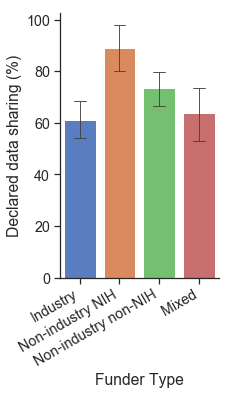

In [51]:
# Plot percentage of declared data sharing by Funder type, Figure 1A in the manuscript. 

sns.set_context("notebook", font_scale=1.3)

sns_fig1A=sns.catplot(x="FunderType", y="DeclaredDataSharing", kind="bar", 
            palette="muted", aspect=0.7,
            ci=95,n_boot=100000,capsize=0.3,errwidth=0.9,
            estimator=lambda x: sum(x==1)*100.0/len(x),
            order = ["1_Industry", "2_NonIndustryNIH", "3_NonIndustryNonNIH","4_Mixed"], 
            data = ClinicalTrialsDataSharing)
sns_fig1A.set(xlabel="Funder Type", ylabel = "Declared data sharing (%)")
sns_fig1A.set_xticklabels(["Industry", "Non-industry NIH", "Non-industry non-NIH","Mixed"])
sns_fig1A.fig.autofmt_xdate()
get_CIs = plt.gca().lines
sns_fig1A.savefig("Fig1A_DeclaredDataSharingByFunderType.pdf")

In [52]:
# Extract Lower and Upper 95% confidence intervals by Funder type

lower95CI = [get_CI.get_ydata().min() for get_CI in get_CIs]
upper95CI = [get_CI.get_ydata().max() for get_CI in get_CIs]
print("Lower 95% CI by Funder type:", lower95CI[::3])
print("Upper 95% CI by Funder type:", upper95CI[::3])

Lower 95% CI by Funder type: [54.30107526881721, 80.0, 66.47398843930635, 53.01204819277108]
Upper 95% CI by Funder type: [68.27956989247312, 97.77777777777777, 79.76878612716763, 73.49397590361446]


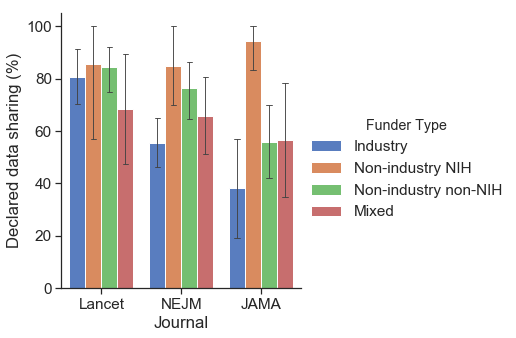

In [53]:
# Plot percentage of declared data sharing by Funder type and Journal, Figure 1B in the manuscript. 

sns.set_context("notebook", font_scale=1.4)

sns_fig1B=sns.catplot(x="Journal", y="DeclaredDataSharing", hue="FunderType", kind="bar", palette="muted",
            ci=95,n_boot=100000,capsize=0.07,errwidth=0.9,
            estimator=lambda x: sum(x==1)*100.0/len(x),
            hue_order = ["1_Industry", "2_NonIndustryNIH", "3_NonIndustryNonNIH","4_Mixed"],
            data=ClinicalTrialsDataSharing)
sns_fig1B.set(ylabel = "Declared data sharing (%)")

legend_sns_fig1B = sns_fig1B._legend
legend_sns_fig1B.set_title("Funder Type")
for a, b in zip(legend_sns_fig1B.texts,("Industry", "Non-industry NIH", "Non-industry non-NIH","Mixed")):
    a.set_text(b)
#get_CIs = plt.gca().lines
sns_fig1B.savefig("Fig1B_DeclaredDataSharingByJournalByFunderType.pdf")

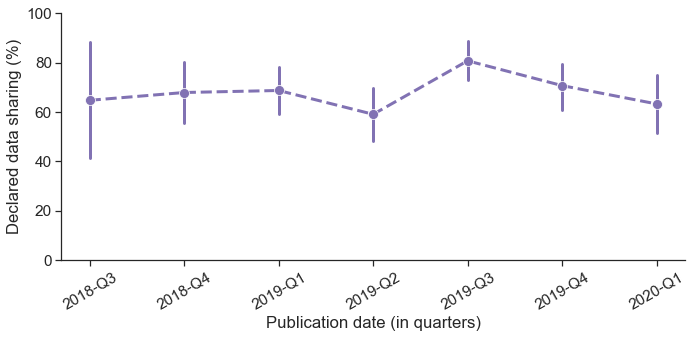

In [54]:
# Plot percentage of declared data sharing by Publication date represented in quarters, Figure 1C in the manuscript. 
sns.set(style="ticks", color_codes=True)
#sns.set_context("notebook", font_scale=1.4)

#sns.set_style("dark")
sns.set_context("notebook", font_scale=1.4,rc={"lines.linewidth": 3,'lines.markersize': 10})
plt.figure(figsize=(10,5))
ax = sns.lineplot(x="PublicationYearQuarter", y="DeclaredDataSharing", err_style="bars",
                  ci=95,n_boot=100000,marker='o',
                  estimator=lambda x: sum(x==1)*100.0/len(x),
                  color='m',
                  data=ClinicalTrialsDataSharing)

ax.lines[0].set_linestyle("--")
ax.lines[0].set_linewidth(3)
ax.set(ylim=(0, 100))
ax.set(ylabel = "Declared data sharing (%)")
ax.set(xlabel = "Publication date (in quarters)")
plt.xticks(rotation=30)
plt.tight_layout()
sns.despine()
ax.figure.savefig("Fig1C_DeclaredDataSharingByPublicationDate.pdf")

In [55]:
# Count the number of articles per quarter

ClinicalTrialsDataSharing.groupby(['PublicationYearQuarter'])['ID'].count()

PublicationYearQuarter
2018-Q3    17
2018-Q4    56
2019-Q1    83
2019-Q2    83
2019-Q3    88
2019-Q4    92
2020-Q1    68
Name: ID, dtype: int64

# 4. Repository name and number of articles intending to store data in respective reepository, as stated in DSS (Figure 2 in the manuscript)

In [56]:
# First aggregate repositories mentioned only in one article/DSS into category Other.

ClinicalTrialsDataSharing_Other=ClinicalTrialsDataSharing.replace({'RepositoryName': 
                        {'Clinical Trial Research Centre (CTRC) University of Liverpool': 'Other',
                        'University of Glasgow Robertson Centre for Biostatistics': 'Other',
                        'Clinical Trials Unit University of Bern': 'Other',
                        'Free Bank of Injury and Emergency Research Data (freeBIRD)': 'Other',
                        'GEMINI Shared Repository (GEMShare)': 'Other',
                        'HCA Healthcare data enclave': 'Other',
                        'University of Minesota Repository': 'Other',
                        'USAID Development Data Library (DDL)': 'Other',
                        'Virtual Trials Archives, VISTA': 'Other'}})

# Count the number of intending-to-store-IPD-in-repository articles per repository 
ClinicalTrialsDataSharing_Other_RepositoryCount=ClinicalTrialsDataSharing_Other.groupby(['RepositoryName'])['ID'].\
                                        count().to_frame(name='count').reset_index()

# Sort repositories and place Other at the end  
ClinicalTrialsDataSharing_Other_RepositoryCount_Sorted = ClinicalTrialsDataSharing_Other_RepositoryCount.\
                                        reindex([2,3,1,9,10,4,6,0,5,8,7])

display(ClinicalTrialsDataSharing_Other_RepositoryCount_Sorted)

,RepositoryName,count
2,ClinicalStudyDateRequest.com (CSDR),31
3,NCTN/NCORP Data Archive,10
1,BioLINCC NHLBI Biospecimens and Data,9
9,The Yale Open Data Access (YODA) Project,7
10,Vivli Center for Global Clinical Research Data,7
4,NICHD Data and Specimen Hub (DASH),5
6,NINDS Archived Clinical Research Datasets,4
0,Bern Open Repository and Information System (BORIS),3
5,NIDDK Central Repository,2
8,The Jaeb Center for Health Research,2


In [57]:
# Display the actual value for each bar on the plot
#See https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
    
def show_values_on_bars(axs, h_v="v", space=0.5):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()-0.2
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

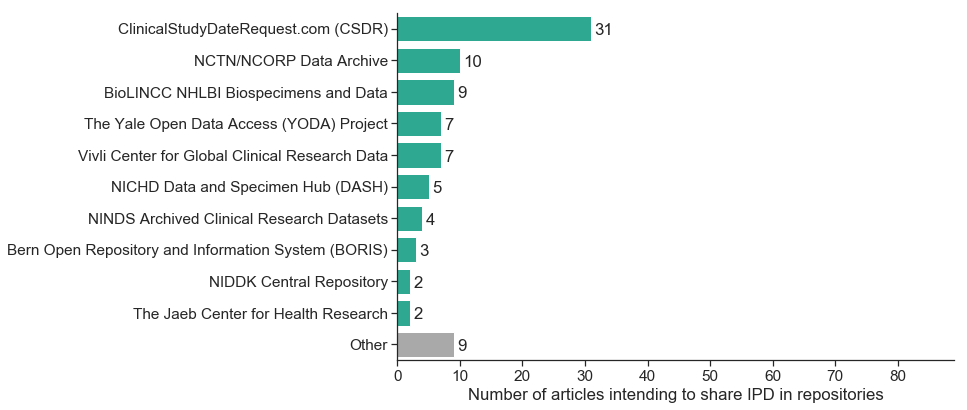

In [58]:
# Plot Figure 2 in the manuscript

sns.set(style="ticks", color_codes=True)
sns.set_context("notebook", font_scale=1.4)
sns_fig2=sns.catplot(x="count", y="RepositoryName", kind="bar", 
                     data=ClinicalTrialsDataSharing_Other_RepositoryCount_Sorted, 
                     orient="h",height=6, aspect=14/6, 
                     palette=sns.color_palette(['#1abc9c','#1abc9c','#1abc9c','#1abc9c','#1abc9c','#1abc9c',
                                                '#1abc9c','#1abc9c','#1abc9c','#1abc9c','darkgrey']))
ax = plt.gca()
show_values_on_bars(ax,"h",0.5)

ax.set_ylabel('')
ax.set(xlim=(0, 89))
ax.set_xlabel('Number of articles intending to share IPD in repositories')
sns_fig2.savefig("Fig2_Repositories_IPD_IntendToShare.pdf")

# 5. Declared versus actual data sharing (Figure 3 in the manuscript)

In [59]:
# Create data frame using aggreegate quantities about clinical trial data sharing computed in previous sections 

Data_Fig3 = {'IndicatorsDataSharing': ['AllArticles','DeclaredDataSharing=YES','DataType=IPD','RqstRepository',
                 'InformationAboutDataOnRepository','DataAvailableOnRepository', 'DataAvailableToOthers'],
        'NumberOfArticles': [487,334,255,89,20,17,2]}

Data_Fig3_df = pd.DataFrame(Data_Fig3, columns = ['IndicatorsDataSharing', 'NumberOfArticles'])
Data_Fig3_df

,IndicatorsDataSharing,NumberOfArticles
0,AllArticles,487
1,DeclaredDataSharing=YES,334
2,DataType=IPD,255
3,RqstRepository,89
4,InformationAboutDataOnRepository,20
5,DataAvailableOnRepository,17
6,DataAvailableToOthers,2


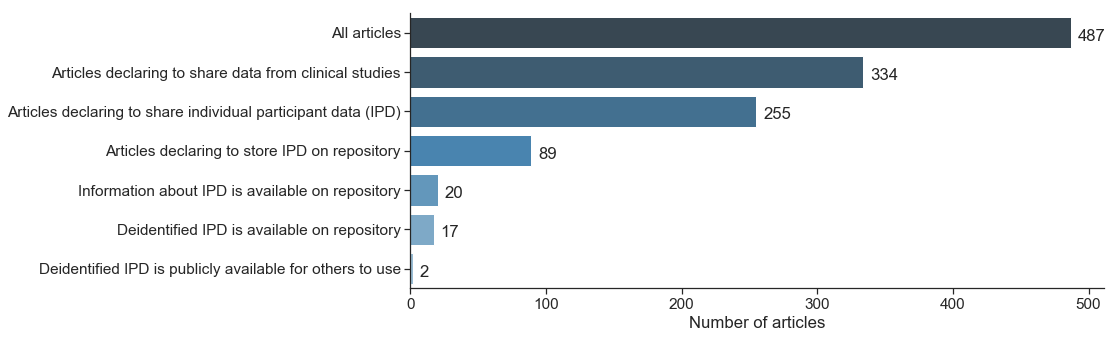

In [60]:
# Plot Figure 3 in the manuscript

sns.set(style="ticks", color_codes=True)
sns.set_context("notebook", font_scale=1.4)
sns_fig3=sns.catplot(x="NumberOfArticles", y="IndicatorsDataSharing", kind="bar", data=Data_Fig3_df, 
                     orient="h",height=5, aspect=14/5, palette='Blues_d')
ax = plt.gca()
show_values_on_bars(ax,"h",5)
sns_fig3.set_yticklabels(["All articles", 
                          "Articles declaring to share data from clinical studies", 
                          "Articles declaring to share individual participant data (IPD)",
                          "Articles declaring to store IPD on repository",
                          "Information about IPD is available on repository",
                          "Deidentified IPD is available on repository",
                          "Deidentified IPD is publicly available for others to use"])

ax.set_ylabel('')
ax.set_xlabel('Number of articles')
sns_fig3.savefig("Fig3_DeclaredActualDataSharing.pdf")